# **EDA**

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import re

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# **EDA-1 (Bike Details)**

In [ ]:
#Let us load the dataset first.

df = pd.read_csv('/content/drive/MyDrive/PW_Course/Datasets/BIKE DETAILS.csv')
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


1. **What is the range of selling prices in the dataset?**

In [ ]:
# Calculate the range of selling prices
min_selling_price = df['selling_price'].min()
max_selling_price = df['selling_price'].max()


print(f"The minimum selling price is: {min_selling_price}")
print(f"The maximum selling price is: {max_selling_price}")

The minimum selling price is: 5000
The maximum selling price is: 760000


2. **What is the median selling price for bikes in the dataset?**

In [ ]:
# Calculate the median selling price
median_selling_price = df['selling_price'].median()


print(f"The median selling price is: {median_selling_price}")

The median selling price is: 45000.0


3. **What is the most common seller type?**

In [ ]:
# Find the most frequent seller type
most_common_seller_type = df['seller_type'].mode()[0]


print(f"The most common seller type is: {most_common_seller_type}")

The most common seller type is: Individual


4. **How many bikes have driven more than 50,000 kilometers?**

In [ ]:
# Count bikes with more than 50,000 km driven
bikes_over_50000_km = df[df['km_driven'] > 50000].shape[0]


print(f"Number of bikes driven more than 50,000 km: {bikes_over_50000_km}")

Number of bikes driven more than 50,000 km: 170


5. **What is the average km_driven value for each ownership type?**

In [ ]:
# Calculate the average km_driven for each owner type
average_km_driven_by_owner = df.groupby('owner')['km_driven'].mean()


print("Average km_driven by Owner type:\n", average_km_driven_by_owner.to_markdown(numalign="left", stralign="left"))

Average km_driven by Owner type:
 | owner     | km_driven   |
|:----------|:------------|
| 1st owner | 32816.6     |
| 2nd owner | 39289       |
| 3rd owner | 33292.2     |
| 4th owner | 311500      |


6. **What proportion of bikes are from the year 2015 or older?**

In [ ]:
# Calculate the proportion of bikes from 2015 or older
older_bikes_proportion = df[df['year'] <= 2015].shape[0] / df.shape[0]


print(f"The proportion of bikes from 2015 or older is: {100*older_bikes_proportion:.2f} percent")

The proportion of bikes from 2015 or older is: 56.64 percent


7. **What is the trend of missing values across the dataset?**

In [ ]:
# Calculate missing values per column
missing_values_count = df.isnull().sum()

# Calculate percentage of missing values per column
missing_values_percentage = (missing_values_count / len(df)) * 100

# Create a table summarizing missing value information
missing_data_table = pd.DataFrame({
    'Total Missing': missing_values_count,
    'Percentage Missing': missing_values_percentage
})

# Print the missing values information
print(missing_data_table.to_markdown(numalign="left", stralign="left"))

|                   | Total Missing   | Percentage Missing   |
|:------------------|:----------------|:---------------------|
| name              | 0               | 0                    |
| selling_price     | 0               | 0                    |
| year              | 0               | 0                    |
| seller_type       | 0               | 0                    |
| owner             | 0               | 0                    |
| km_driven         | 0               | 0                    |
| ex_showroom_price | 435             | 40.9991              |


8. **What is the highest ex_showroom_price recorded, and for which bike?**

In [ ]:
# Filter out rows with missing 'ex_showroom_price'
valid_prices = df.dropna(subset=['ex_showroom_price'])

# Find the highest ex-showroom price
highest_price = valid_prices['ex_showroom_price'].max()

# Find the bike(s) with the highest ex-showroom price
highest_price_bike = valid_prices[valid_prices['ex_showroom_price'] == highest_price]['name'].values


print(f"The highest ex-showroom price recorded is: {highest_price}")
print(f"The bike(s) with the highest ex-showroom price: {highest_price_bike}")

The highest ex-showroom price recorded is: 1278000.0
The bike(s) with the highest ex-showroom price: ['Harley-Davidson Street Bob']


9. **What is the total number of bikes listed by each seller type?**

In [ ]:
# Count the number of bikes for each seller type
bike_counts_by_seller_type = df.groupby('seller_type').size()


print("Number of bikes by Seller type:\n", bike_counts_by_seller_type.to_markdown(numalign="left", stralign="left"))

Number of bikes by Seller type:
 | seller_type   | 0    |
|:--------------|:-----|
| Dealer        | 6    |
| Individual    | 1055 |


10. **What is the relationship between selling_price and km_driven for first-owner bikes?**

In [ ]:
# Filter data for first-owner bikes
first_owner_bikes = df[df['owner'] == '1st owner']

# Calculate the correlation between 'selling_price' and 'km_driven' for first-owner bikes
correlation_first_owner = first_owner_bikes['selling_price'].corr(first_owner_bikes['km_driven'])


print(f"The correlation between selling_price and km_driven for first-owner bikes is: {correlation_first_owner:.2f}")

The correlation between selling_price and km_driven for first-owner bikes is: -0.24


11. **Identify and remove outliers in the km_driven column using the IQR method.**

In [ ]:
# Calculate Q1 and Q3
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define bounds for outlier removal
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_filtered = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

# Display the first 5 rows of the filtered dataframe
print(df_filtered.head().to_markdown(index=False, numalign="left", stralign="left"))

# Print the shape of the filtered dataframe
print(f"The shape of the filtered dataframe is: {df_filtered.shape}")

| name                                | selling_price   | year   | seller_type   | owner     | km_driven   | ex_showroom_price   |
|:------------------------------------|:----------------|:-------|:--------------|:----------|:------------|:--------------------|
| Royal Enfield Classic 350           | 175000          | 2019   | Individual    | 1st owner | 350         | nan                 |
| Honda Dio                           | 45000           | 2017   | Individual    | 1st owner | 5650        | nan                 |
| Royal Enfield Classic Gunmetal Grey | 150000          | 2018   | Individual    | 1st owner | 12000       | 148114              |
| Yamaha Fazer FI V 2.0 [2016-2018]   | 65000           | 2015   | Individual    | 1st owner | 23000       | 89643               |
| Yamaha SZ [2013-2014]               | 20000           | 2011   | Individual    | 2nd owner | 21000       | nan                 |
The shape of the filtered dataframe is: (1022, 7)


12. **Perform a bivariate analysis to visualize the relationship between year and selling_price.**

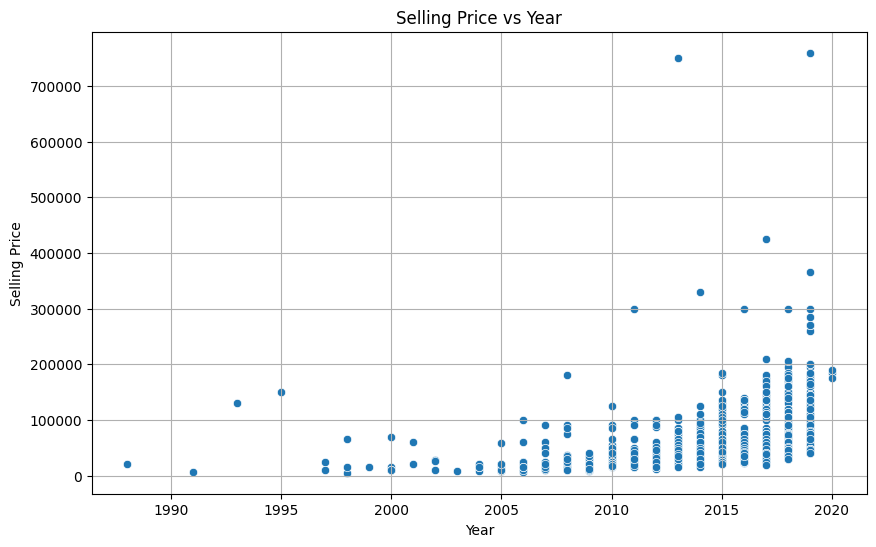

In [ ]:
# Create the scatter plot
plt.figure(figsize=(10, 6)) # Adjust figure size for better readability
sns.scatterplot(data=df, x='year', y='selling_price') # Create the scatter plot with `year` on x-axis and `selling_price` on y-axis
plt.title('Selling Price vs Year')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.grid(True) # Add gridlines for easier reading
plt.savefig('year_vs_selling_price_scatterplot_seaborn.png') # Save the plot as a PNG file
plt.show()

13. **What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)?**

In [ ]:
# Calculate the age of the bikes
current_year = 2025 # Use the current year
df['age'] = current_year - df['year']

# Calculate the average selling price for each age
average_selling_price_by_age = df.groupby('age')['selling_price'].mean()


print("Average selling price by bike age:\n", average_selling_price_by_age.to_markdown(numalign="left", stralign="left"))

Average selling price by bike age:
 | age   | selling_price   |
|:------|:----------------|
| 5     | 183333          |
| 6     | 119690          |
| 7     | 87660.4         |
| 8     | 78894.7         |
| 9     | 58469           |
| 10    | 56500           |
| 11    | 48668.1         |
| 12    | 51137           |
| 13    | 35748.4         |
| 14    | 35655.7         |
| 15    | 31793.3         |
| 16    | 22267.9         |
| 17    | 34289.3         |
| 18    | 24927.6         |
| 19    | 23380           |
| 20    | 16978.6         |
| 21    | 15100           |
| 22    | 8000            |
| 23    | 20666.7         |
| 24    | 40000           |
| 25    | 20833.3         |
| 26    | 15000           |
| 27    | 28333.3         |
| 28    | 17500           |
| 30    | 150000          |
| 32    | 130000          |
| 34    | 6000            |
| 37    | 20000           |


14. **Which bike names are priced significantly above the average price for their manufacturing year?**

In [ ]:
# Calculate the average selling price for each year
average_selling_price_by_year = df.groupby('year')['selling_price'].mean().reset_index()

# Merge the average selling price back into the original dataframe
df_merged = df.merge(average_selling_price_by_year, on='year', suffixes=('', '_avg'))

# Identify bikes priced significantly above the average for their year
# You can adjust the threshold (e.g., 1.2, 1.5) to define "significantly above"
threshold_multiplier = 1.5
expensive_bikes = df_merged[df_merged['selling_price'] > threshold_multiplier * df_merged['selling_price_avg']]

# Get the names of these bikes
expensive_bike_names = expensive_bikes['name'].unique()

# Print the names of the expensive bikes
print("Bikes priced significantly above the average for their manufacturing year:\n", expensive_bike_names)

Bikes priced significantly above the average for their manufacturing year:
 ['Royal Enfield Classic Gunmetal Grey'
 'Royal Enfield Bullet 350 [2007-2011]' 'Yamaha YZF R3' 'Jawa Standard'
 'Royal Enfield Thunderbird 350' 'Honda CBR-250R' 'Bajaj Dominar 400'
 'KTM 390 Duke' 'Royal Enfield Electra 5 S' 'Royal Enfield Bullet 350'
 'Royal Enfield Electra 4 S' 'Mahindra Mojo XT300'
 'Hero Honda Karizma ZMR [2010]' 'Royal Enfield Thunderbird 350X'
 'Royal Enfield Classic Desert Storm' 'Yamaha FZ25' 'UM Renegade Commando'
 'Royal Enfield Classic 350' 'Royal Enfield Continental GT 650'
 'Harley-Davidson Street Bob' 'KTM 390 Duke ABS [2013-2016]'
 'Royal Enfield Classic 500' 'KTM RC 390' 'Bajaj Pulsar 150' 'KTM RC 200'
 'Honda CB Unicorn 150' 'Royal Enfield Bullet 500'
 'Bajaj Dominar 400 [2018]' 'Royal Enfield Interceptor 650'
 'Royal Enfield Machismo' 'KTM 250 Duke' 'Kawasaki Ninja 650 [2018-2019]'
 'Kawasaki Ninja 250R' 'Suzuki GSX S750' 'Yamaha Rx' 'Yamaha Fazer Dlx'
 'Harley-Davidson Street

15. **Develop a correlation matrix for numeric columns and visualize it using a heatmap.**

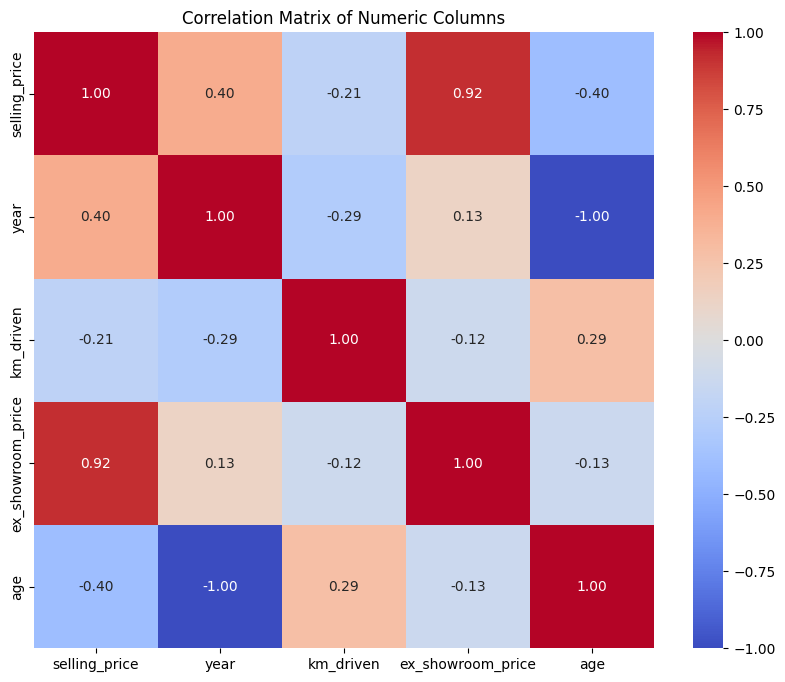

In [ ]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Visualize the correlation matrix as a heatmap using seaborn
plt.figure(figsize=(10, 8))  # Adjust figure size for better readability
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f") # Create the heatmap
plt.title('Correlation Matrix of Numeric Columns') # Set the title of the heatmap
plt.savefig('correlation_matrix_heatmap_seaborn.png') # Save the heatmap as a PNG file
plt.show()

# **EDA-2 (Car Sales)**

In [ ]:
#Let us load the dataset first.

df1 = pd.read_csv('/content/drive/MyDrive/PW_Course/Datasets/Car Sale.csv')
df1.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


1. **What is the average selling price of cars for each dealer, and how does it compare across different dealers?**

In [ ]:
# Calculate the average selling price for each dealer
average_price_by_dealer = df1.groupby('Dealer_Name')['Price ($)'].mean()


print("Average selling price of cars for each dealer:\n", average_price_by_dealer.to_markdown(numalign="left", stralign="left"))

Average selling price of cars for each dealer:
 | Dealer_Name                                     | Price ($)   |
|:------------------------------------------------|:------------|
| Buddy Storbeck's Diesel Service Inc             | 27217.3     |
| C & M Motors Inc                                | 28111.8     |
| Capitol KIA                                     | 28189.7     |
| Chrysler Plymouth                               | 27555.5     |
| Chrysler of Tri-Cities                          | 28123.1     |
| Classic Chevy                                   | 28602       |
| Clay Johnson Auto Sales                         | 27816       |
| Diehl Motor CO Inc                              | 27993.9     |
| Enterprise Rent A Car                           | 28312.6     |
| Gartner Buick Hyundai Saab                      | 28247.6     |
| Hatfield Volkswagen                             | 27853.7     |
| Iceberg Rentals                                 | 28523       |
| McKinney Dodge Chrysler Je

2. **Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?**

In [ ]:
# Calculate the standard deviation of prices for each company
price_variation_by_company = df1.groupby('Company')['Price ($)'].std()

# Find the company with the highest price variation
company_highest_variation = price_variation_by_company.idxmax()
highest_price_variation = price_variation_by_company.max()


print(f"The car brand with the highest variation in prices is: {company_highest_variation} with a standard deviation of {highest_price_variation:.2f}")

The car brand with the highest variation in prices is: Lincoln with a standard deviation of 19658.05


A high standard deviation in prices for Lincoln indicates a wide range of models or pricing strategies within that brand. This could be due to:

  - Luxury vs. Economy Models: Lincoln might offer both high-end luxury vehicles and more affordable models.
  - Model Years: Newer Lincoln models might be significantly more expensive than older ones.
  - Optional Features: There could be substantial price differences based on trim levels and added options.
---

3. **What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?**

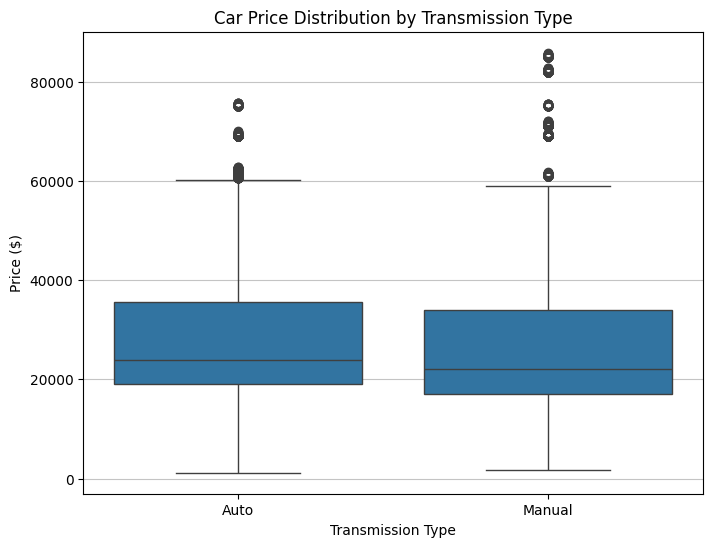

In [ ]:
# Create the boxplot to visualize the distribution of car prices by transmission type
plt.figure(figsize=(8, 6)) # Adjust figure size for better readability
sns.boxplot(data=df1, x='Transmission', y='Price ($)') # Create the boxplot
plt.title('Car Price Distribution by Transmission Type') # Set the title of the plot
plt.xlabel('Transmission Type') # Label the x-axis as "Transmission Type"
plt.ylabel('Price ($)') # Label the y-axis as "Price ($)"
plt.grid(True, axis='y', alpha=0.75) # Add gridlines for easier reading
plt.savefig('car_price_distribution_by_transmission_type_boxplot_seaborn.png') # Save the plot
plt.show()

4. **What is the distribution of car prices across different regions?**

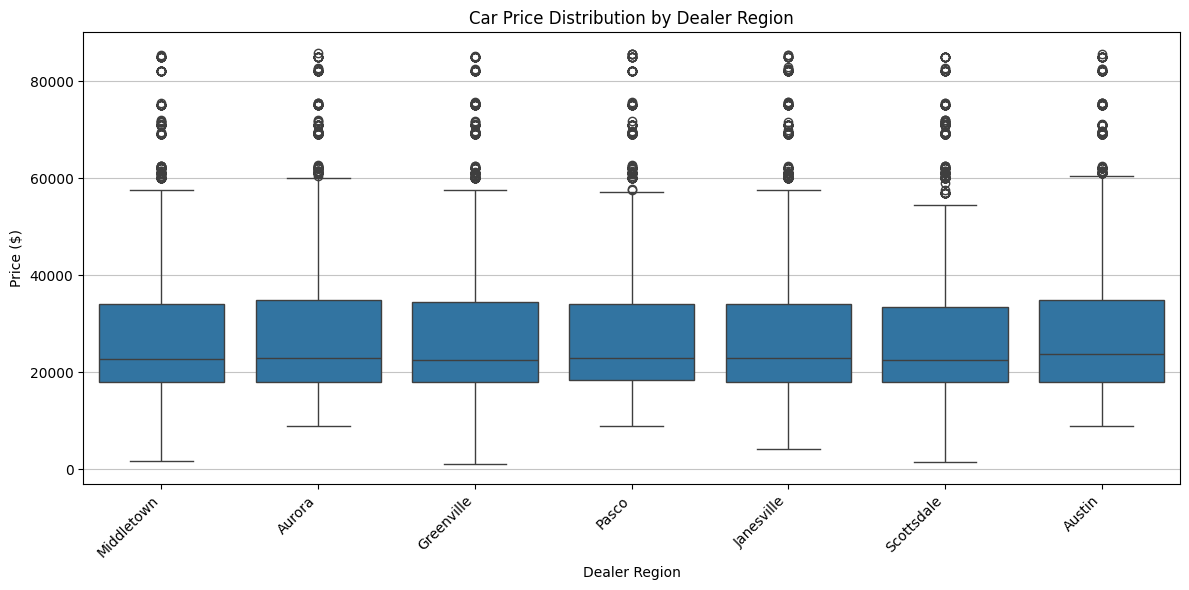

In [ ]:
# Create the boxplot to visualize the distribution of car prices by dealer region
plt.figure(figsize=(12, 6))  # Adjust figure size for better readability
sns.boxplot(data=df1, x='Dealer_Region', y='Price ($)') # Create the boxplot
plt.title('Car Price Distribution by Dealer Region') # Set the title of the plot
plt.xlabel('Dealer Region') # Label the x-axis as "Dealer Region"
plt.ylabel('Price ($)') # Label the y-axis as "Price ($)"
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(True, axis='y', alpha=0.75)  # Add gridlines
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.savefig('car_price_distribution_by_dealer_region_boxplot_seaborn.png') # Save the plot
plt.show()

5. **What is the distribution of cars based on body styles?**

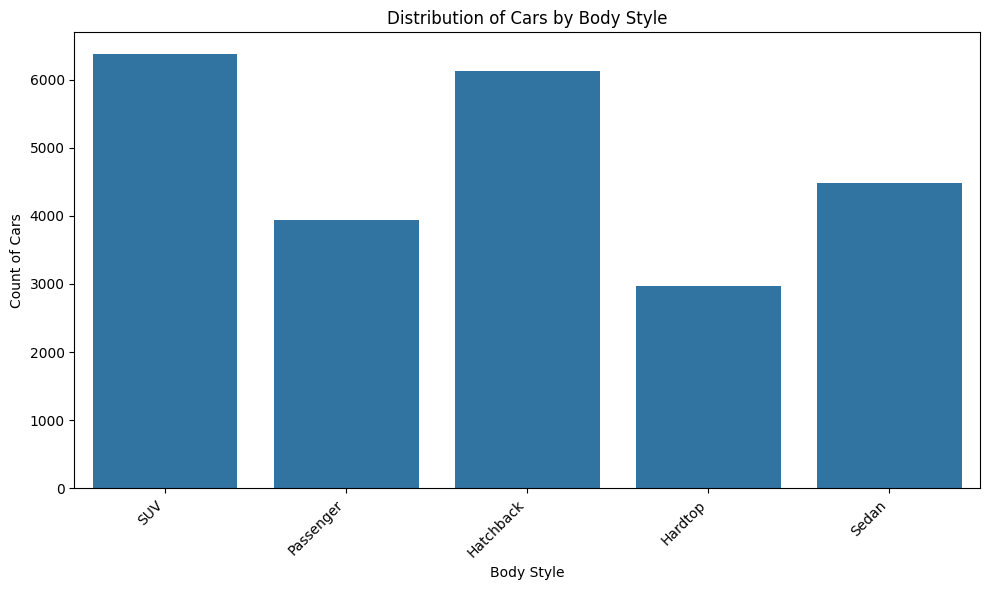

In [ ]:
# Create the count plot to visualize the distribution of cars by body style
plt.figure(figsize=(10, 6)) # Adjust figure size for better readability
sns.countplot(data=df1, x='Body Style') # Create the count plot
plt.title('Distribution of Cars by Body Style') # Set the title of the plot
plt.xlabel('Body Style') # Label the x-axis as "Body Style"
plt.ylabel('Count of Cars') # Label the y-axis as "Count of Cars"
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.savefig('car_distribution_by_body_style_countplot_seaborn.png') # Save the plot
plt.show()

6. **How does the average selling price of cars vary by customer gender and annual income?**

In [ ]:
# Calculate the average selling price by gender
average_price_by_gender = df1.groupby('Gender')['Price ($)'].mean()

# Calculate the correlation between Annual Income and Price
correlation_income_price = df1['Annual Income'].corr(df1['Price ($)'])


print("Average selling price by gender:\n", average_price_by_gender.to_markdown(numalign="left", stralign="left"))
print(f"\nCorrelation between Annual Income and Price: {correlation_income_price:.2f}")

Average selling price by gender:
 | Gender   | Price ($)   |
|:---------|:------------|
| Female   | 28277.3     |
| Male     | 28039.4     |

Correlation between Annual Income and Price: 0.01


7. **What is the distribution of car prices by region. and how does the number of cars sold vary by region?**

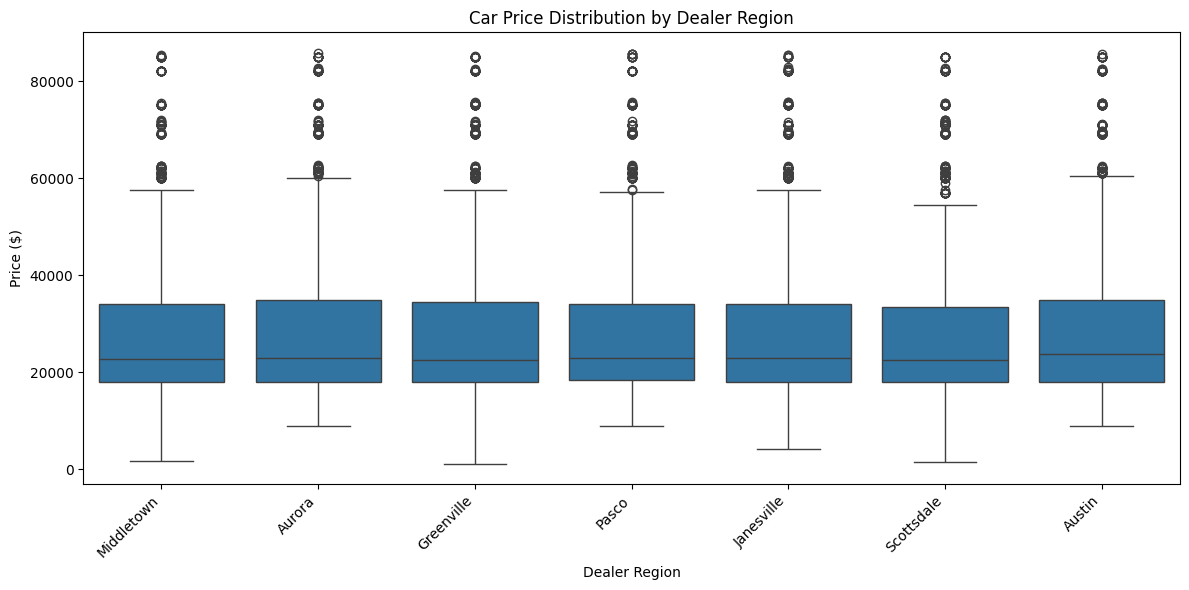

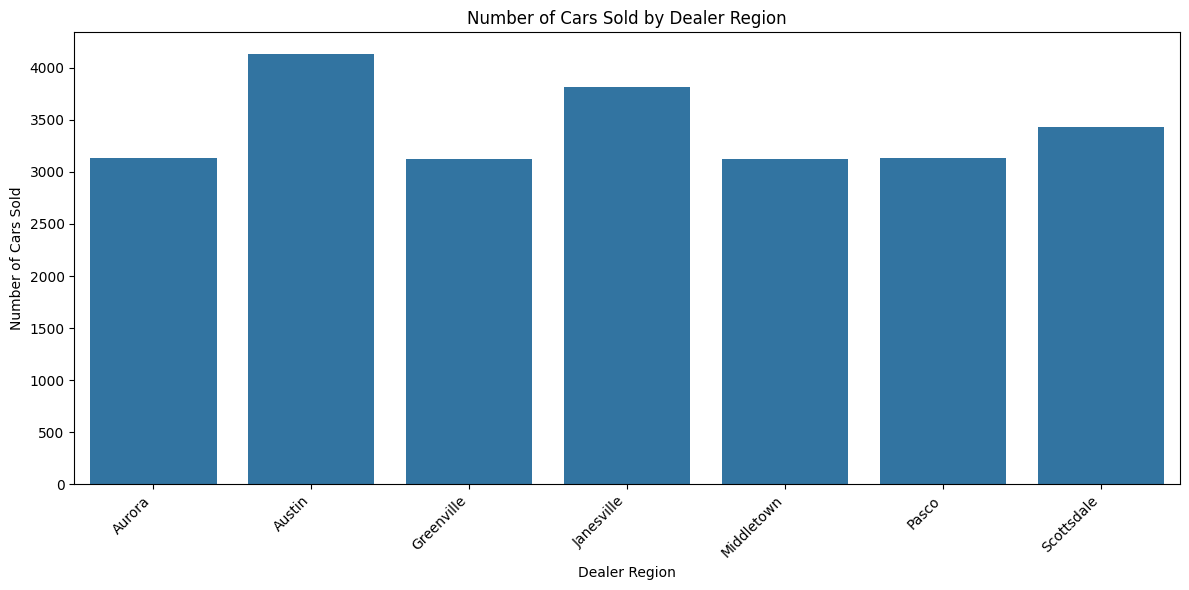


Summary of car prices and counts by region:
 | Dealer_Region   | average_price   | car_count   |
|:----------------|:----------------|:------------|
| Aurora          | 28334.6         | 3130        |
| Austin          | 28341.6         | 4135        |
| Greenville      | 28180.8         | 3128        |
| Janesville      | 27833.4         | 3821        |
| Middletown      | 27856.3         | 3128        |
| Pasco           | 28119           | 3131        |
| Scottsdale      | 27955           | 3433        |


In [ ]:
# Calculate average price and car counts by region
region_summary = df1.groupby('Dealer_Region').agg(
    average_price=('Price ($)', 'mean'),
    car_count=('Car_id', 'count')
).reset_index()

# Visualize price distribution with a boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df1, x='Dealer_Region', y='Price ($)')
plt.title('Car Price Distribution by Dealer Region')
plt.xlabel('Dealer Region')
plt.ylabel('Price ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('car_price_distribution_by_region_boxplot_seaborn.png')
plt.show()

# Visualize car counts with a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=region_summary, x='Dealer_Region', y='car_count')
plt.title('Number of Cars Sold by Dealer Region')
plt.xlabel('Dealer Region')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('car_count_by_region_barplot_seaborn.png')
plt.show()

# Display the summary data
print("\nSummary of car prices and counts by region:\n", region_summary.to_markdown(index=False, numalign="left", stralign="left"))

8. **How does the average car price differ between cars with different engines sizes?**

In [ ]:
# Calculate the average car price for each engine type
average_price_by_engine = df1.groupby('Engine')['Price ($)'].mean()


print("Average car price by engine type:\n", average_price_by_engine.to_markdown(numalign="left", stralign="left"))

Average car price by engine type:
 | Engine                    | Price ($)   |
|:--------------------------|:------------|
| DoubleÂ Overhead Camshaft | 28248.5     |
| Overhead Camshaft         | 27914.7     |


9. **How do car prices vary based on the customer's annual income bracket?**

<ipython-input-38-cff6137980c4>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_bracket_summary = df1.groupby('Income_Bracket').agg(


Average car prices and counts by income bracket:
 | Income_Bracket   | avg_price   | car_count   |
|:-----------------|:------------|:------------|
| 0-50K            | 27884.3     | 5275        |
| 50K-100K         | 43000       | 1           |
| 100K-200K        | 19536.1     | 14          |
| 200K-500K        | 28565.5     | 2088        |
| 500K-1M          | 27987       | 8847        |
| 1M+              | 28235.1     | 7681        |


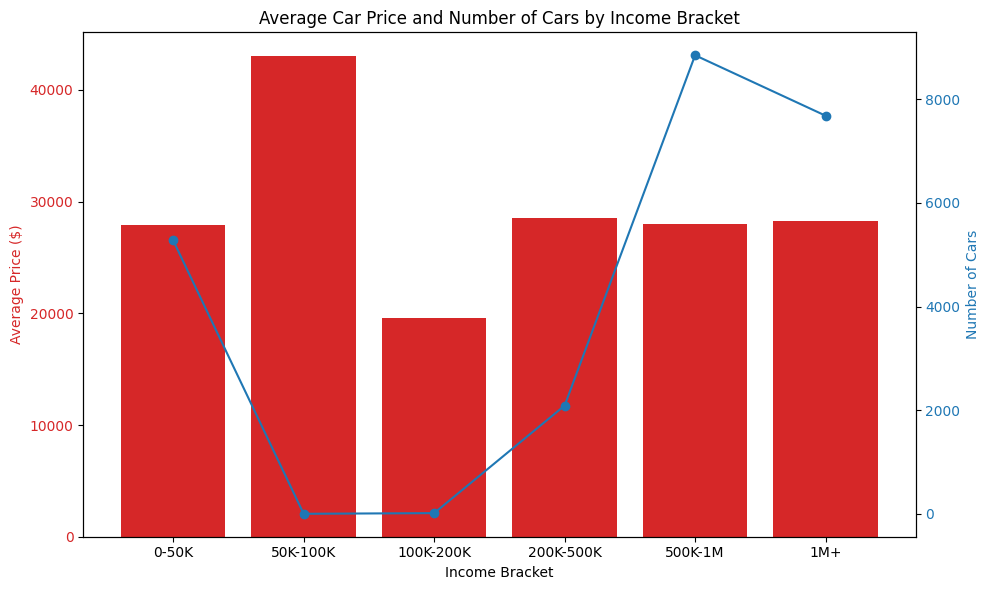

In [ ]:
# Define income brackets
bins = [0, 50000, 100000, 200000, 500000, 1000000, float('inf')]
labels = ['0-50K', '50K-100K', '100K-200K', '200K-500K', '500K-1M', '1M+']

# Create the Income_Bracket column
df1['Income_Bracket'] = pd.cut(df1['Annual Income'], bins=bins, labels=labels, right=False)

# Calculate average price and counts by income bracket
income_bracket_summary = df1.groupby('Income_Bracket').agg(
    avg_price=('Price ($)', 'mean'),
    car_count=('Car_id', 'count')
).reset_index()

# Display the result
print("Average car prices and counts by income bracket:\n", income_bracket_summary.to_markdown(index=False, numalign="left", stralign="left"))

# Visualize the data
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for average price
color = 'tab:red'
ax1.set_xlabel('Income Bracket')
ax1.set_ylabel('Average Price ($)', color=color)
ax1.bar(income_bracket_summary['Income_Bracket'], income_bracket_summary['avg_price'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for car counts
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Number of Cars', color=color)
ax2.plot(income_bracket_summary['Income_Bracket'], income_bracket_summary['car_count'], color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Average Car Price and Number of Cars by Income Bracket')
plt.tight_layout()
plt.show()

10. **What are the top 5 car models with the highest number of sales, and how does their price distribution look?**

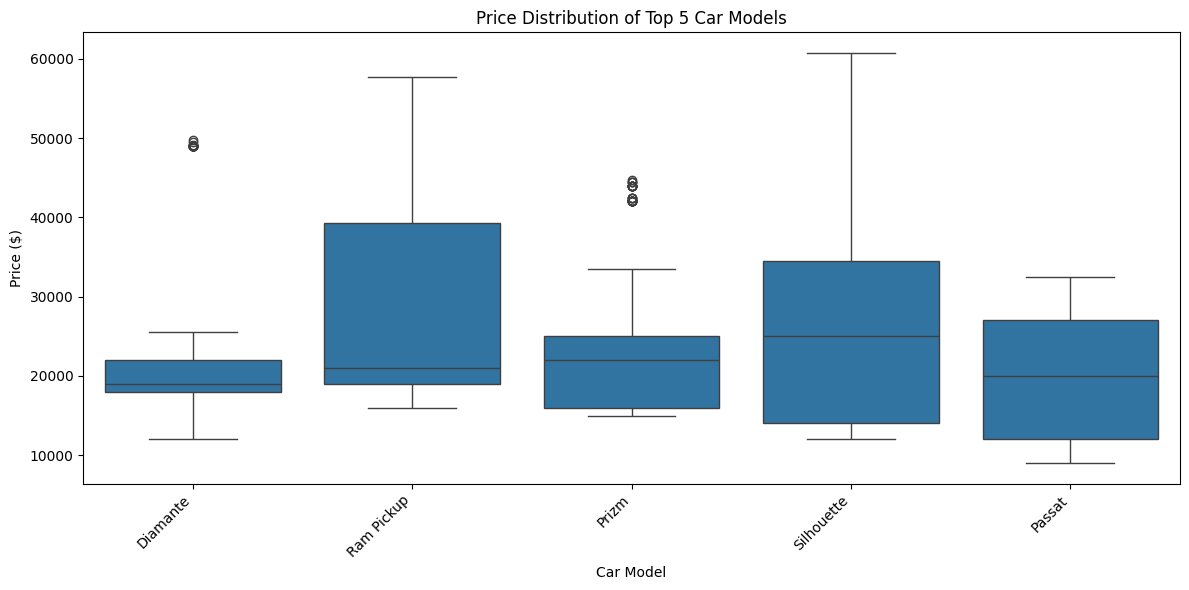

In [ ]:
# Count the occurrences of each model
model_counts = df1['Model'].value_counts()

# Get the top 5 models
top_5_models = model_counts.head(5).index.tolist()

# Filter the DataFrame to include only the top 5 models
df_top_5 = df1[df1['Model'].isin(top_5_models)]

# Visualize the price distribution of the top 5 models
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top_5, x='Model', y='Price ($)')
plt.title('Price Distribution of Top 5 Car Models')
plt.xlabel('Car Model')
plt.ylabel('Price ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

11. **How does car price vary with engine sizes across different car colors, and which colors have the highest price variation?**

Average Price by Engine Type and Color:
 | Engine                    |   Black |   Pale White |     Red |
|:--------------------------|--------:|-------------:|--------:|
| DoubleÂ Overhead Camshaft | 25766.5 |      30348   | 27434.4 |
| Overhead Camshaft         | 31733   |      24327.8 | 30153.4 |


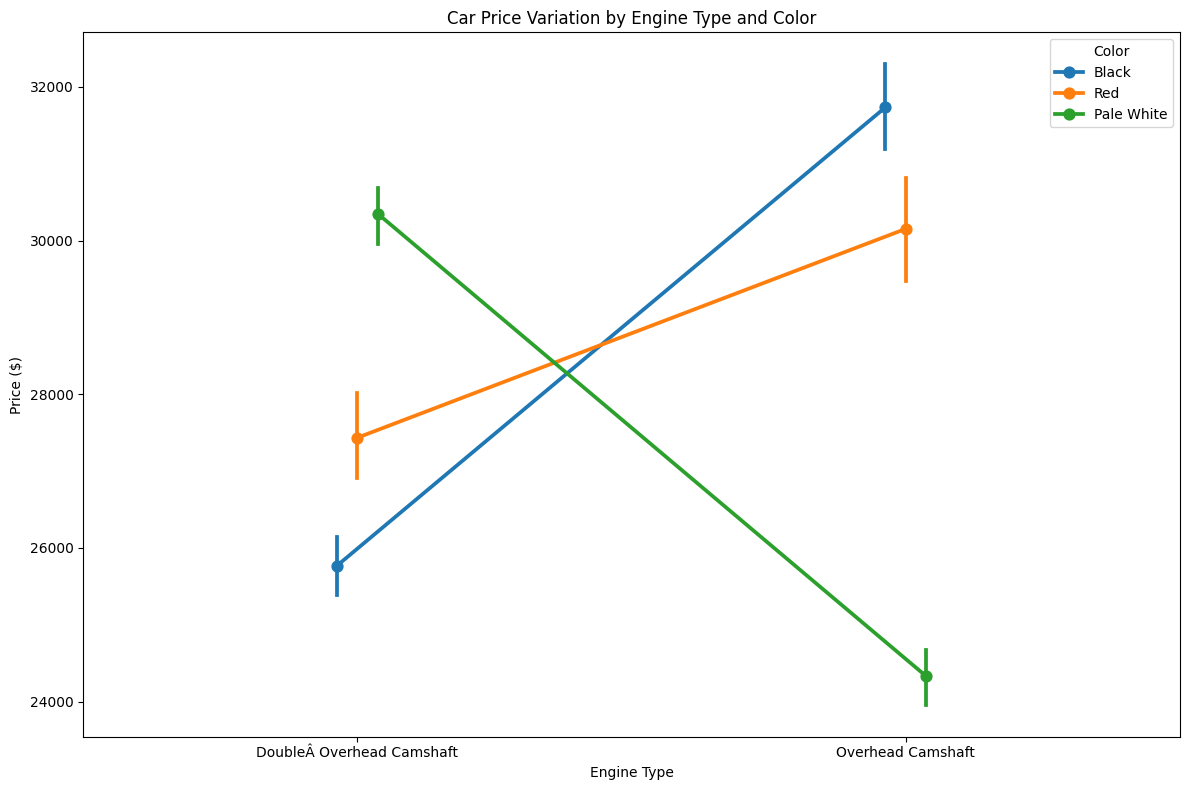


Price Variation (Standard Deviation) by Color:
 | Color      |   Price ($) |
|:-----------|------------:|
| Red        |     15519.4 |
| Black      |     15286.1 |
| Pale White |     14077.3 |


In [ ]:
# Calculate the average price for each combination of Engine and Color
average_price_by_engine_color = df1.groupby(['Engine', 'Color'])['Price ($)'].mean().unstack()

print("Average Price by Engine Type and Color:\n", average_price_by_engine_color.to_markdown())

# Visualize the relationship using a point plot
plt.figure(figsize=(12, 8))
sns.pointplot(data=df1, x='Engine', y='Price ($)', hue='Color', dodge=True)
plt.title('Car Price Variation by Engine Type and Color')
plt.xlabel('Engine Type')
plt.ylabel('Price ($)')
plt.xticks(rotation=0)
plt.legend(title='Color')
plt.tight_layout()
plt.show()

# Calculate price variation (standard deviation) for each color
price_variation_by_color = df1.groupby('Color')['Price ($)'].std().sort_values(ascending=False)

print("\nPrice Variation (Standard Deviation) by Color:\n", price_variation_by_color.to_markdown())

12. **Is there any seasonal trend in car sales based on the date of sale?**

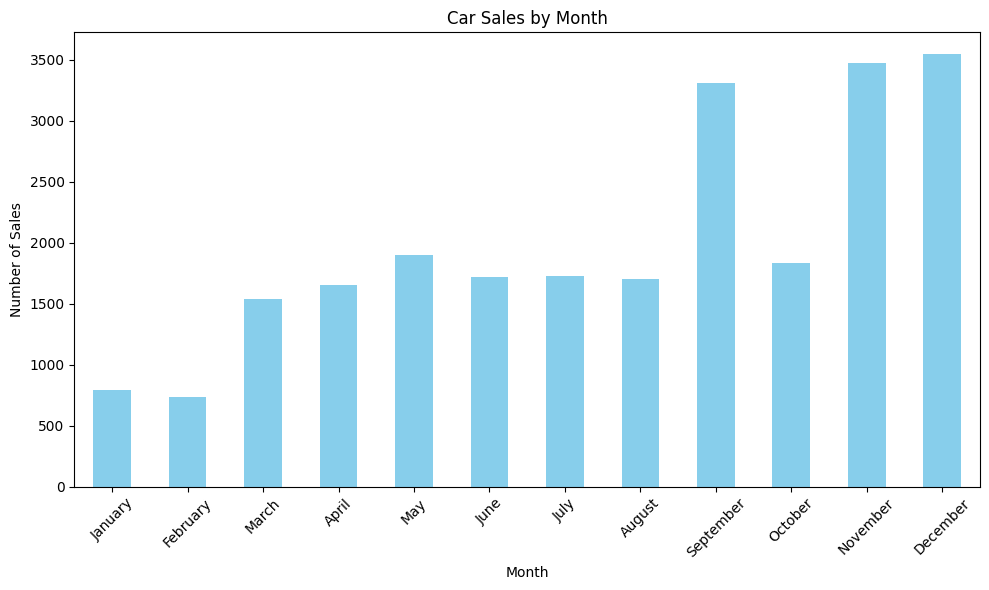

In [ ]:
# Convert 'Date' to datetime
df1['Date'] = pd.to_datetime(df1['Date'], format='%m/%d/%Y')

# Extract month from 'Date'
df1['Month'] = df1['Date'].dt.month_name()

# Group by 'Month' and count the number of sales
sales_by_month = df1['Month'].value_counts().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

# Visualize the sales trend
plt.figure(figsize=(10, 6))
sales_by_month.plot(kind='bar', color='skyblue')
plt.title('Car Sales by Month')
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

13. **How does the car price distribution change when considering different combinations of body style and transmission type?**

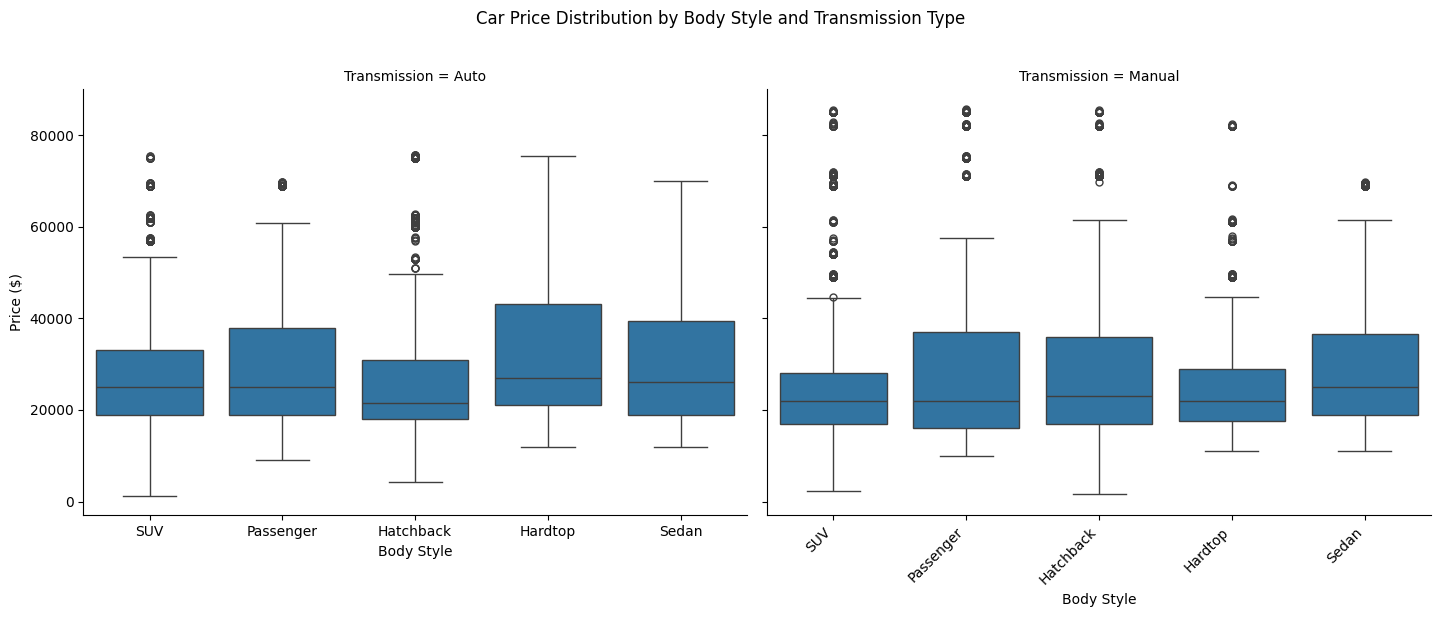

In [ ]:
# Visualize the distribution of car prices by body style and transmission type using facet_grid
sns.catplot(data=df1, x='Body Style', y='Price ($)', col='Transmission', kind='box', height=6, aspect=1.2,  # Adjust height and aspect
            col_wrap=2)  # Wrap columns if there are too many
plt.suptitle('Car Price Distribution by Body Style and Transmission Type', y=1.02) # Set the title of the plot
plt.xticks(rotation=45, ha='right')
plt.xlabel('Body Style')
plt.ylabel('Price ($)')
plt.tight_layout()
plt.show()

14. **What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?**

Correlation Matrix:
 |               |   Price ($) |   Annual Income |
|:--------------|------------:|----------------:|
| Price ($)     |    1        |        0.012065 |
| Annual Income |    0.012065 |        1        |


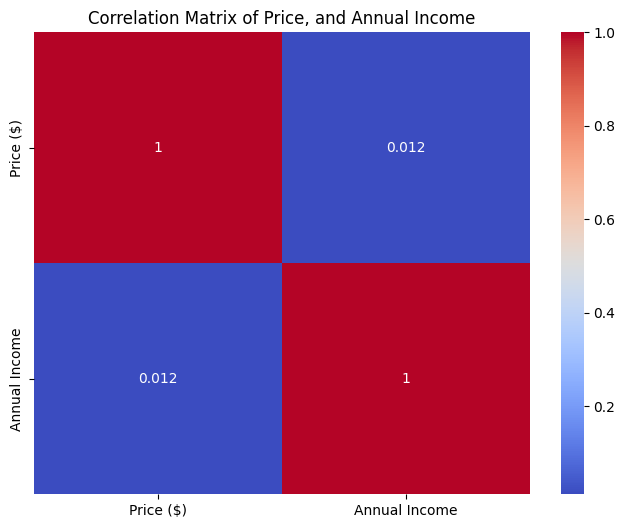

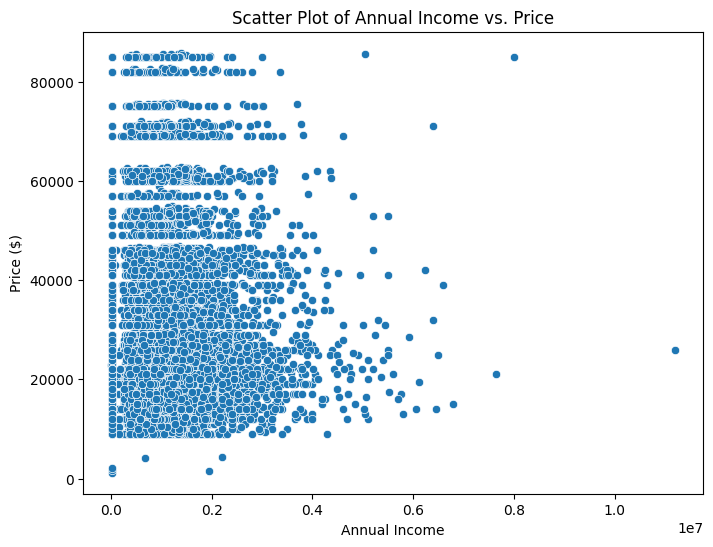

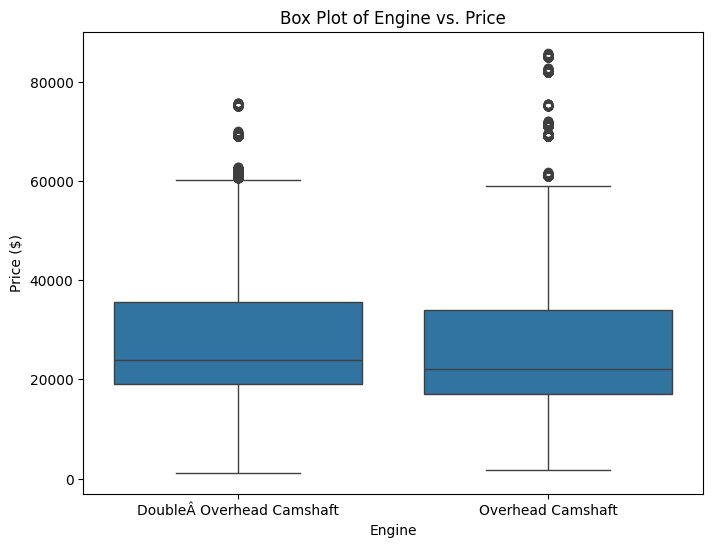

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df1[['Price ($)', 'Annual Income']].corr()

# Print the correlation matrix
print("Correlation Matrix:\n", correlation_matrix.to_markdown())

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Price, and Annual Income')
plt.show()

# Visualize the relationship between Annual Income and Price
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df1, x='Annual Income', y='Price ($)')
plt.title('Scatter Plot of Annual Income vs. Price')
plt.show()

# Visualize the relationship between Engine and Price
plt.figure(figsize=(8, 6))
sns.boxplot(data=df1, x='Engine', y='Price ($)')
plt.title('Box Plot of Engine vs. Price')
plt.show()

15. **How does the average car price vary across different car models and engine types?**

In [ ]:
# Calculate average price by model and engine type
average_price_by_model_engine = df1.groupby(['Model', 'Engine'])['Price ($)'].mean().reset_index()


print(average_price_by_model_engine.head(20).to_markdown(index=False, numalign="left", stralign="left"))

| Model   | Engine                    | Price ($)   |
|:--------|:--------------------------|:------------|
| 3-Sep   | DoubleÂ Overhead Camshaft | 37986.4     |
| 3000GT  | DoubleÂ Overhead Camshaft | 22764.3     |
| 3000GT  | Overhead Camshaft         | 21770.7     |
| 300M    | DoubleÂ Overhead Camshaft | 21394.9     |
| 323i    | DoubleÂ Overhead Camshaft | 16744.6     |
| 323i    | Overhead Camshaft         | 21038.2     |
| 328i    | DoubleÂ Overhead Camshaft | 21069.1     |
| 328i    | Overhead Camshaft         | 38676.2     |
| 4Runner | DoubleÂ Overhead Camshaft | 32167.8     |
| 4Runner | Overhead Camshaft         | 25075.4     |
| 5-Sep   | DoubleÂ Overhead Camshaft | 41067       |
| 5-Sep   | Overhead Camshaft         | 28071.5     |
| 528i    | DoubleÂ Overhead Camshaft | 46288.7     |
| 528i    | Overhead Camshaft         | 21197.9     |
| A4      | DoubleÂ Overhead Camshaft | 27070.5     |
| A4      | Overhead Camshaft         | 12046.2     |
| A6      | DoubleÂ Overhead

# **EDA-3 (Amazon Sales Data)**

In [ ]:
#Let us load the dataset first.

df2 = pd.read_csv('/content/drive/MyDrive/PW_Course/Datasets/amazon.csv')
df2.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


1. **What is the average rating for each product category?**

In [ ]:
# Calculate the average rating for each product category
df2['rating'] = pd.to_numeric(df2['rating'], errors='coerce')
average_rating_by_category = df2.groupby('category')['rating'].mean()


print("Average rating for each product category:\n", average_rating_by_category)

Average rating for each product category:
 category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                    3.800000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                   4.150000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                           3.500000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                        3.600000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                           4.050000
                                                                                                                            ...   
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens        4.250000
OfficeProducts|OfficePaperProdu

2. **What are the top rating_count products by category?**

In [ ]:
# Sort the DataFrame by 'category' and then by 'rating_count' in descending order
df_sorted = df2.sort_values(by=['category', 'rating_count'], ascending=[True, False])

# Get the top 5 products by rating_count within each category
# This will keep the first 5 entries for each category after sorting
top_products_by_category = df_sorted.groupby('category').head(5)

# Select and display the relevant columns
print("Top rating_count products by category:\n", top_products_by_category[['category', 'product_name', 'rating', 'rating_count']])

Top rating_count products by category:
                                                category  \
1157  Car&Motorbike|CarAccessories|InteriorAccessori...   
695   Computers&Accessories|Accessories&Peripherals|...   
742   Computers&Accessories|Accessories&Peripherals|...   
906   Computers&Accessories|Accessories&Peripherals|...   
772   Computers&Accessories|Accessories&Peripherals|...   
...                                                 ...   
858   OfficeProducts|OfficePaperProducts|Paper|Stati...   
850   OfficeProducts|OfficePaperProducts|Paper|Stati...   
919   OfficeProducts|OfficePaperProducts|Paper|Stati...   
955   OfficeProducts|OfficePaperProducts|Paper|Stati...   
924   Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...   

                                           product_name  rating rating_count  
1157  Reffair AX30 [MAX] Portable Air Purifier for C...     3.8        1,118  
695   rts [2 Pack] Mini USB C Type C Adapter Plug, T...     4.3        4,426  
742   Kanget [

3. **What is the distribution of discounted prices vs actual prices?**

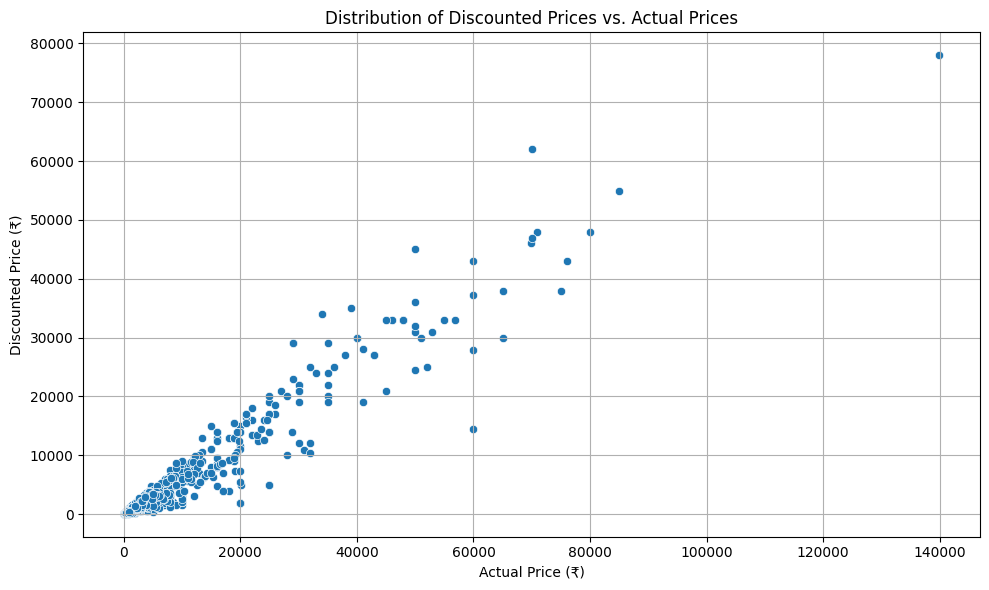

In [16]:
# Clean and convert price columns to numeric, handling potential errors
df2['discounted_price'] = df2['discounted_price'].astype(str).str.replace('₹', '', regex=False).str.replace(',', '').astype(float)
df2['actual_price'] = df2['actual_price'].astype(str).str.replace('₹', '', regex=False).str.replace(',', '').astype(float)

# Create a scatter plot of `discounted_price` vs `actual_price`
plt.figure(figsize=(10,6))
sns.scatterplot(data=df2, x='actual_price', y='discounted_price')

# Add labels and title
plt.xlabel('Actual Price (₹)')
plt.ylabel('Discounted Price (₹)')
plt.title('Distribution of Discounted Prices vs. Actual Prices')
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

4. **How does the average discount percentage vary across categories?**

In [17]:
# Extract the main category from the 'category' column
# The category is often structured like 'MainCategory|SubCategory|SubSubCategory', so splitting by '|' and taking the first part should work.
df2['main_category'] = df2['category'].apply(lambda x: x.split('|')[0].strip())

# Convert 'discount_percentage' to numeric
# Remove '%' and convert to float, then divide by 100 to get a decimal
df2['discount_percentage'] = df2['discount_percentage'].str.replace('%', '', regex=False).astype(float) / 100

# Calculate the average discount percentage for each main category
average_discount_by_category = df2.groupby('main_category')['discount_percentage'].mean().reset_index()

# Sort the results by average discount percentage
average_discount_by_category = average_discount_by_category.sort_values(by='discount_percentage', ascending=False)

# Display the results
print(average_discount_by_category.to_markdown(index=False, numalign="left", stralign="left"))

| main_category         | discount_percentage   |
|:----------------------|:----------------------|
| HomeImprovement       | 0.575                 |
| Computers&Accessories | 0.540243              |
| Health&PersonalCare   | 0.53                  |
| Electronics           | 0.508289              |
| MusicalInstruments    | 0.46                  |
| Car&Motorbike         | 0.42                  |
| Home&Kitchen          | 0.401205              |
| OfficeProducts        | 0.123548              |
| Toys&Games            | 0                     |


5. **What are the most popular product names?**

In [18]:
# Convert 'rating_count' to numeric, handling potential non-numeric values
# Replace commas and convert to float.
df2['rating_count'] = df2['rating_count'].str.replace(',', '', regex=False)

# Some `rating_count` values might be non-numeric (e.g., 'No ratings available').
# Convert to numeric, coercing errors to NaN, then fill NaN with 0 for summation.
df2['rating_count'] = pd.to_numeric(df2['rating_count'], errors='coerce').fillna(0)

# Group by 'product_name' and sum 'rating_count'
popularity_by_product = df2.groupby('product_name')['rating_count'].sum().reset_index()

# Sort by rating_count in descending order
most_popular_products = popularity_by_product.sort_values(by='rating_count', ascending=False)

# Display the top 10 most popular product names
print(most_popular_products.head(10).to_markdown(index=False, numalign="left", stralign="left"))

| product_name                                                                                                                            | rating_count   |
|:----------------------------------------------------------------------------------------------------------------------------------------|:---------------|
| AmazonBasics Flexible Premium HDMI Cable (Black, 4K@60Hz, 18Gbps), 3-Foot                                                               | 853945         |
| Amazon Basics High-Speed HDMI Cable, 6 Feet - Supports Ethernet, 3D, 4K video,Black                                                     | 426973         |
| Amazon Basics High-Speed HDMI Cable, 6 Feet (2-Pack),Black                                                                              | 426973         |
| JBL C100SI Wired In Ear Headphones with Mic, JBL Pure Bass Sound, One Button Multi-function Remote, Angled Buds for Comfort fit (Black) | 385177         |
| boAt Bassheads 100 in Ear Wired Earphones with Mic(Taffy

6. **What are the most popular product keywords?**

In [21]:
# Define a list of common English stop words
stop_words = set([
    "a", "an", "the", "and", "or", "but", "about", "above", "after", "again", "against", "all", "am", "an", "any", "are", "aren't", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "can't", "cannot", "could", "couldn't", "did", "didn't", "do", "does", "doesn't", "doing", "don't", "down", "during", "each", "few", "for", "from", "further", "had", "hadn't", "has", "hasn't", "have", "haven't", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "isn't", "it", "it's", "its", "itself", "let's", "me", "more", "most", "mustn't", "my", "myself", "no", "nor", "not", "of", "off", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "shan't", "she", "she'd", "she'll", "she's", "should", "shouldn't", "so", "some", "such", "than", "that", "that's", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "wasn't", "we", "we'd", "we'll", "we're", "we've", "were", "weren't", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "won't", "would", "wouldn't", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves"
])

# Initialize a dictionary to store keyword popularity
keyword_popularity = defaultdict(int)

# Iterate through each row to extract keywords and sum rating counts
for index, row in df2.iterrows():
    # Combine relevant text fields
    text_to_process = str(row['product_name']) + ' ' + str(row['about_product'])

    # Clean and tokenize the text
    text_to_process = text_to_process.lower()
    text_to_process = re.sub(r'[^\w\s]', '', text_to_process) # Remove punctuation
    words = text_to_process.split()

    # Filter out stop words and add to keyword_popularity
    for word in words:
        if word not in stop_words and len(word) > 1: # Exclude single-character words
            keyword_popularity[word] += row['rating_count']

# Convert the dictionary to a DataFrame for easier sorting and display
popular_keywords_df = pd.DataFrame(keyword_popularity.items(), columns=['keyword', 'total_rating_count'])

# Sort by total_rating_count in descending order
popular_keywords_df = popular_keywords_df.sort_values(by='total_rating_count', ascending=False)

# Display the top 20 most popular keywords
print(popular_keywords_df.head(20).to_markdown(index=False, numalign="left", stralign="left"))

| keyword    | total_rating_count   |
|:-----------|:---------------------|
| usb        | 2.25352e+07          |
| cable      | 2.197e+07            |
| charging   | 1.30938e+07          |
| black      | 1.19708e+07          |
| warranty   | 1.18199e+07          |
| wireless   | 1.00017e+07          |
| devices    | 9.7386e+06           |
| can        | 9.58781e+06          |
| battery    | 9.34433e+06          |
| display    | 9.29091e+06          |
| hd         | 9.17415e+06          |
| compatible | 8.5257e+06           |
| design     | 8.00594e+06          |
| watch      | 7.935e+06            |
| fast       | 7.9317e+06           |
| earphones  | 7.8455e+06           |
| bluetooth  | 7.7363e+06           |
| power      | 7.51763e+06          |
| year       | 7.46771e+06          |
| boat       | 7.24296e+06          |


7. **What are the most popular product reviews?**

In [22]:
# Group by 'product_name' and sum 'rating_count'
popularity_by_product = df2.groupby('product_name')['rating_count'].sum().reset_index()

# Sort by rating_count in descending order
most_popular_products = popularity_by_product.sort_values(by='rating_count', ascending=False)

# Get the product IDs of the top 10 most popular products
top_10_product_names = most_popular_products.head(10)['product_name'].tolist()

print("Most Popular Product Reviews (from top 10 most popular products):\n")

# Iterate through the top 10 popular product names
for product_name in top_10_product_names:
    # Get all reviews for the current popular product
    product_reviews = df2[df2['product_name'] == product_name]

    print(f"Product: {product_name}")
    print("-" * (len(product_name) + 9)) # Separator

    # Display up to 3 reviews for each product (or all if less than 3)
    for i, review in product_reviews.head(3).iterrows():
        review_title = review['review_title']
        review_content = review['review_content']

        # Truncate long review content for readability
        if len(review_content) > 200:
            review_content = review_content[:200] + "..."

        print(f"  Review Title: {review_title}")
        print(f"  Review Content: {review_content}\n")
    print("\n") # Add a newline between products for better readability

Most Popular Product Reviews (from top 10 most popular products):

Product: AmazonBasics Flexible Premium HDMI Cable (Black, 4K@60Hz, 18Gbps), 3-Foot
----------------------------------------------------------------------------------
  Review Title: It's quite good and value for money,Works well,Hdmi cable,Value for money,All good,Gets the job done,Delivery was good,This one was my need to purchase
  Review Content: I am using it for 14 days now. The experience is pretty good as of now. Picture quality is also not bad. Don't expect something out of the world at this price point. But you can go for it if you have ...

  Review Title: It's quite good and value for money,Works well,Hdmi cable,Value for money,All good,Gets the job done,Delivery was good,This one was my need to purchase
  Review Content: I am using it for 14 days now. The experience is pretty good as of now. Picture quality is also not bad. Don't expect something out of the world at this price point. But you can go for it if

8. **What is the correlation between discounted_price and rating?**

In [24]:
# Clean and convert 'discounted_price' to numeric
df2['discounted_price'] = df2['discounted_price'].astype(str).str.replace('₹', '', regex=False).str.replace(',', '').astype(float)

# Clean and convert 'rating' to numeric
# Check for unique values in 'rating' to identify non-numeric entries
# print(df['rating'].unique()) # This would help identify specific non-numeric strings

# Based on common issues, 'rating' might contain 'No ratings available' or similar text.
# Replace such text with NaN and then convert to float.
df2['rating'] = df2['rating'].replace(['No ratings available'], pd.NA)
df2['rating'] = pd.to_numeric(df2['rating'], errors='coerce')

# Drop rows where either 'discounted_price' or 'rating' is NaN to ensure accurate correlation calculation
df_cleaned = df2.dropna(subset=['discounted_price', 'rating'])

# Calculate the correlation between 'discounted_price' and 'rating'
correlation = df_cleaned['discounted_price'].corr(df_cleaned['rating'])

# Display the correlation
print(f"The correlation between discounted price and rating is: {correlation:.2f}")

The correlation between discounted price and rating is: 0.12


9. **What are the Top 5 categories based on the highest ratings?**

In [25]:
# Extract the main category
df2['main_category'] = df2['category'].apply(lambda x: x.split('|')[0].strip())

# Drop rows where 'rating' is NaN before calculating average
df_cleaned_ratings = df2.dropna(subset=['rating'])

# Group by 'main_category' and calculate the average rating
average_rating_by_category = df_cleaned_ratings.groupby('main_category')['rating'].mean().reset_index()

# Sort the results by average rating in descending order
top_categories_by_rating = average_rating_by_category.sort_values(by='rating', ascending=False)

# Display the top 5 categories
print(top_categories_by_rating.head(5).to_markdown(index=False, numalign="left", stralign="left"))

| main_category         | rating   |
|:----------------------|:---------|
| OfficeProducts        | 4.30968  |
| Toys&Games            | 4.3      |
| HomeImprovement       | 4.25     |
| Computers&Accessories | 4.15497  |
| Electronics           | 4.08175  |


10. **Identify any potential areas for improvement or optimization based on the data analysis.**

  Ans. Based on the data analysis, here are several potential areas for improvement and optimization:

  1. Re-evaluate Discounting Strategy:
      - Weak Correlation between Discount and Rating: The very weak positive correlation (0.12) between discounted_price and rating suggests that simply offering a discount does not significantly influence product ratings. This implies that customers might prioritize product quality, features, or brand reputation over just the price reduction when leaving reviews.
        - Optimization: Consider shifting focus from aggressive price reductions to highlighting product value, quality, and unique features, especially for products where margins might be tight.
      - Targeted Discounts:
        - Categories like Toys&Games and OfficeProducts have lower average discount percentages but achieve high average ratings. This indicates strong performance even without deep discounts, possibly due to intrinsic value or demand.
          - Optimization: For these high-rated, lower-discount categories, maintain current pricing if profit margins are healthy, or selectively test higher discounts to see if it drives significant sales volume without cannibalizing perceived value.
        - Conversely, HomeImprovement, Computers&Accessories, and Health&PersonalCare have the highest average discount percentages. If the goal in these categories is to improve customer satisfaction and ratings, companies might need to invest in product quality, customer service, or clearer product descriptions rather than relying solely on discounts.

  2. Optimize Product Portfolio and Inventory:
      - Capitalize on Popular Product Areas: The analysis of most popular product names and keywords clearly indicates strong demand for electronics and related accessories (e.g., USB, cable, charging, wireless, earphones, bluetooth). Brands like AmazonBasics, JBL, boAt, and Redmi are prominent.
        - Optimization: Ensure robust inventory management for these high-demand product categories. Consider expanding product lines within these popular niches and leveraging brand recognition.
      - Identify Organic Demand: Products that have high rating_count but receive minimal or no discounts suggest strong organic demand.
        - Optimization: Marketing efforts for these products should focus on their inherent popularity and quality, potentially with less emphasis on price promotions.

  3. Enhance Marketing and Sales Strategies:

      - Value-Based Marketing: Given the weak correlation between discount and rating, marketing messages could be refined to emphasize product features, benefits, and positive user experiences rather than just the discount percentage.
      - SEO and Keyword Optimization: The identified most popular keywords can be directly used to improve search engine optimization (SEO), product descriptions, and ad targeting, reaching customers actively searching for these product attributes.

  4. Leverage Customer Feedback for Product Improvement:

      - Learn from Top-Rated Categories: Analyze the specific attributes and customer experiences that contribute to the high ratings in OfficeProducts, Toys&Games, HomeImprovement, Computers&Accessories, and Electronics.
        - Optimization: Apply these learnings (e.g., product design, durability, ease of use, post-purchase support) to improve products in categories with lower average ratings, fostering higher customer satisfaction across the board.
---

# **EDA-4 (Spotify)**

In [26]:
#Let us load the dataset first.

df3 = pd.read_csv('/content/drive/MyDrive/PW_Course/Datasets/spotify.csv')
df3.head()

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


1. **Read the dataframe, check null value if present then do the needful, check duplicate row, if present do the needful.**

In [27]:
print("Null values before handling:")
print(df3.isnull().sum())
print("\nDuplicate rows before handling:")
print(df3.duplicated().sum())

# Handling null values: Fill NaN with the mode for 'Artist' and 'Track Name', 0 for 'Popularity' and 'Duration (ms)'
for col in ['Artist', 'Track Name']:
    if df3[col].isnull().any():
        mode_val = df3[col][~df3[col].isnull()].mode()[0]
        df3[col].fillna(mode_val, inplace=True)

for col in ['Popularity', 'Duration (ms)']:
    if df3[col].isnull().any():
        df3[col].fillna(0, inplace=True)

# Handling duplicate rows
df3.drop_duplicates(inplace=True)

print("\nNull values after handling:")
print(df3.isnull().sum())
print("\nDuplicate rows after handling:")
print(df3.duplicated().sum())

Null values before handling:
Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

Duplicate rows before handling:
27

Null values after handling:
Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

Duplicate rows after handling:
0


2. **What is the distribution of popularity among the tracks in the dataset? Visualize it using histogram.**

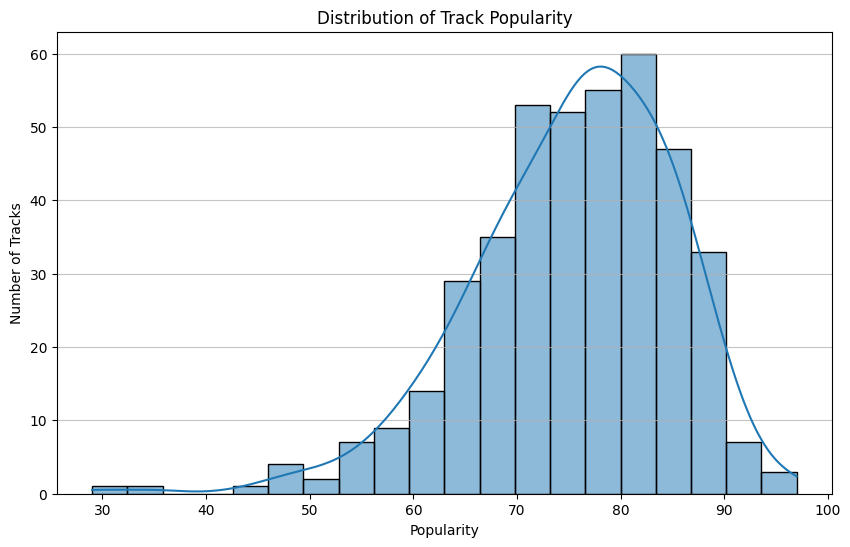

In [28]:
# Create a histogram of the 'Popularity' column
plt.figure(figsize=(10, 6))
sns.histplot(df3['Popularity'], bins=20, kde=True)
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Number of Tracks')
plt.grid(axis='y', alpha=0.75)
plt.show()

3. **Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.**

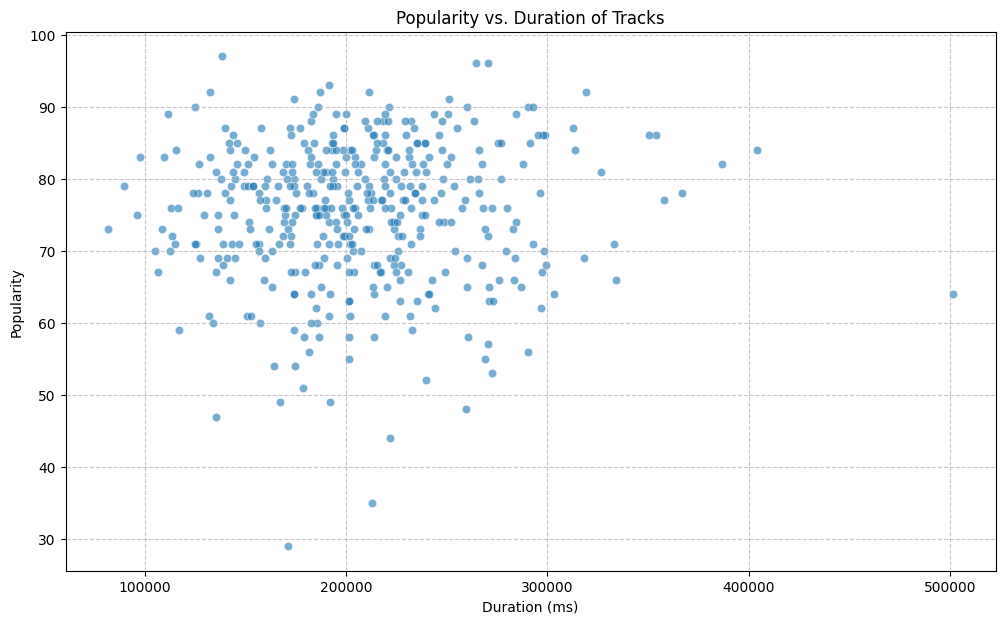

In [29]:
# Create a scatter plot of 'Popularity' vs 'Duration (ms)'
plt.figure(figsize=(12, 7))
sns.scatterplot(x='Duration (ms)', y='Popularity', data=df3, alpha=0.6)
plt.title('Popularity vs. Duration of Tracks')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

4. **Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot.**

The artist with the highest number of tracks is 'Drake' with 17 tracks.


<ipython-input-32-9e50dba74b81>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_n_artists.index, y=top_n_artists.values, palette='viridis')


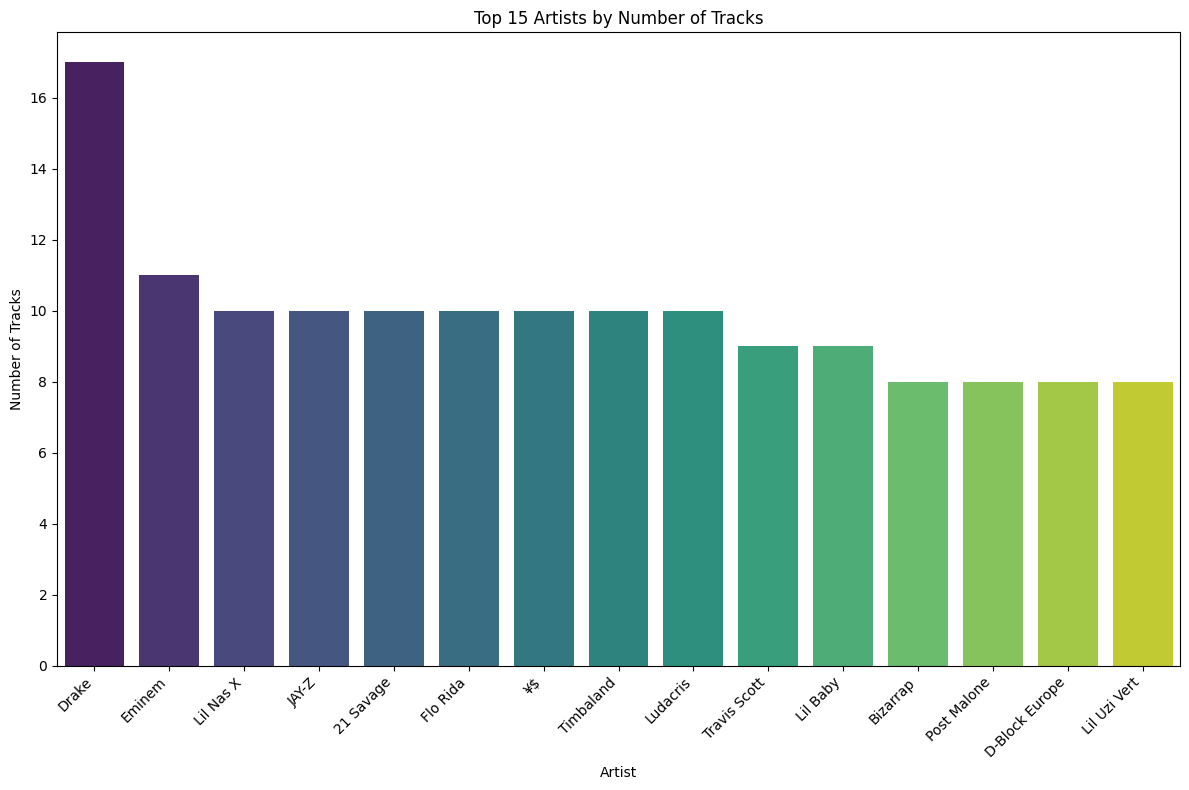

In [32]:
# Calculate the number of tracks per artist
artist_track_counts = df3['Artist'].value_counts()

# Identify the artist with the highest number of tracks
top_artist = artist_track_counts.index[0]
top_artist_count = artist_track_counts.iloc[0]

print(f"The artist with the highest number of tracks is '{top_artist}' with {top_artist_count} tracks.")

# Select the top N artists for visualization (e.g., top 15)
n_artists = 15
top_n_artists = artist_track_counts.head(n_artists)

# Create a countplot for the top N artists
plt.figure(figsize=(12, 8))
sns.barplot(x=top_n_artists.index, y=top_n_artists.values, palette='viridis')
plt.title(f'Top {n_artists} Artists by Number of Tracks')
plt.xlabel('Artist')
plt.ylabel('Number of Tracks')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

5. **What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.**

In [33]:
# Sort the DataFrame by 'Popularity' in ascending order
least_popular_tracks = df3.sort_values(by='Popularity', ascending=True)

# Select the top 5 least popular tracks
top_5_least_popular = least_popular_tracks.head(5)

print("Top 5 Least Popular Tracks:")
# Display the 'Artist' and 'Track Name' for these tracks
for index, row in top_5_least_popular.iterrows():
    print(f"- Artist: {row['Artist']}, Track: {row['Track Name']}")

Top 5 Least Popular Tracks:
- Artist: Pressa, Track: Attachments (feat. Coi Leray)
- Artist: Justin Bieber, Track: Intentions
- Artist: French Montana, Track: Splash Brothers
- Artist: Lil Baby, Track: On Me - Remix
- Artist: Wyclef Jean, Track: 911 (feat. Mary J. Blige)


6. **Among the top 5 popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist.**

In [34]:
# Calculate the average popularity for each artist
average_popularity_per_artist = df3.groupby('Artist')['Popularity'].mean().sort_values(ascending=False)

# Get the top 5 artists based on average popularity
top_5_popular_artists = average_popularity_per_artist.head(5)

print("Average Popularity for Top 5 Popular Artists:")
for artist, avg_pop in top_5_popular_artists.items():
    print(f"- Artist: {artist}, Average Popularity: {avg_pop:.2f}")

# Identify the artist with the highest average popularity among these top 5
highest_avg_popularity_artist = top_5_popular_artists.index[0]
highest_avg_popularity_value = top_5_popular_artists.iloc[0]

print(f"\nAmong the top 5 popular artists, '{highest_avg_popularity_artist}' has the highest average popularity with {highest_avg_popularity_value:.2f}.")

Average Popularity for Top 5 Popular Artists:
- Artist: cassö, Average Popularity: 92.00
- Artist: Trueno, Average Popularity: 89.00
- Artist: David Guetta, Average Popularity: 87.00
- Artist: Travis Scott, Average Popularity: 86.56
- Artist: ¥$, Average Popularity: 85.10

Among the top 5 popular artists, 'cassö' has the highest average popularity with 92.00.


7. **For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.**

In [35]:
# Get the list of top 5 artists from the previous step
top_5_popular_artists_list = ['cassö', 'Trueno', 'David Guetta', 'Travis Scott', '¥$']

print("Most Popular Tracks for the Top 5 Popular Artists:")

for artist in top_5_popular_artists_list:
    # Filter tracks for the current artist
    artist_tracks = df3[df3['Artist'] == artist]

    # Find the track with the highest popularity for this artist
    if not artist_tracks.empty:
        most_popular_track = artist_tracks.loc[artist_tracks['Popularity'].idxmax()]
        track_name = most_popular_track['Track Name']
        popularity = most_popular_track['Popularity']
        print(f"- Artist: {artist}, Most Popular Track: '{track_name}' (Popularity: {popularity})")
    else:
        print(f"- Artist: {artist}, No tracks found in the dataset.")

Most Popular Tracks for the Top 5 Popular Artists:
- Artist: cassö, Most Popular Track: 'Prada' (Popularity: 92)
- Artist: Trueno, Most Popular Track: 'Mamichula - con Nicki Nicole' (Popularity: 89)
- Artist: David Guetta, Most Popular Track: 'Baby Don't Hurt Me' (Popularity: 87)
- Artist: Travis Scott, Most Popular Track: 'FE!N (feat. Playboi Carti)' (Popularity: 93)
- Artist: ¥$, Most Popular Track: 'CARNIVAL' (Popularity: 96)


8. **Visualize relationships between multiple numerical variables simultaneously using a pair plot.**

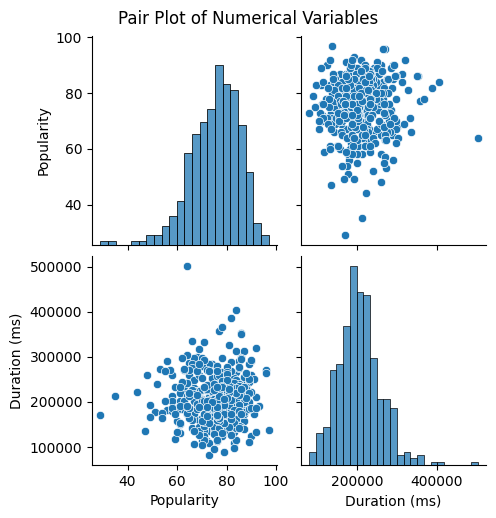

In [36]:
# Select the numerical columns for the pair plot
numerical_cols = ['Popularity', 'Duration (ms)']

# Create a pair plot
sns.pairplot(df3[numerical_cols])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02) # Add a title to the pair plot
plt.show()

9. **Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot.**

<ipython-input-37-71d30b5d41e7>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Artist', y='Duration (ms)', data=df_filtered, inner='quartile', palette='tab10')


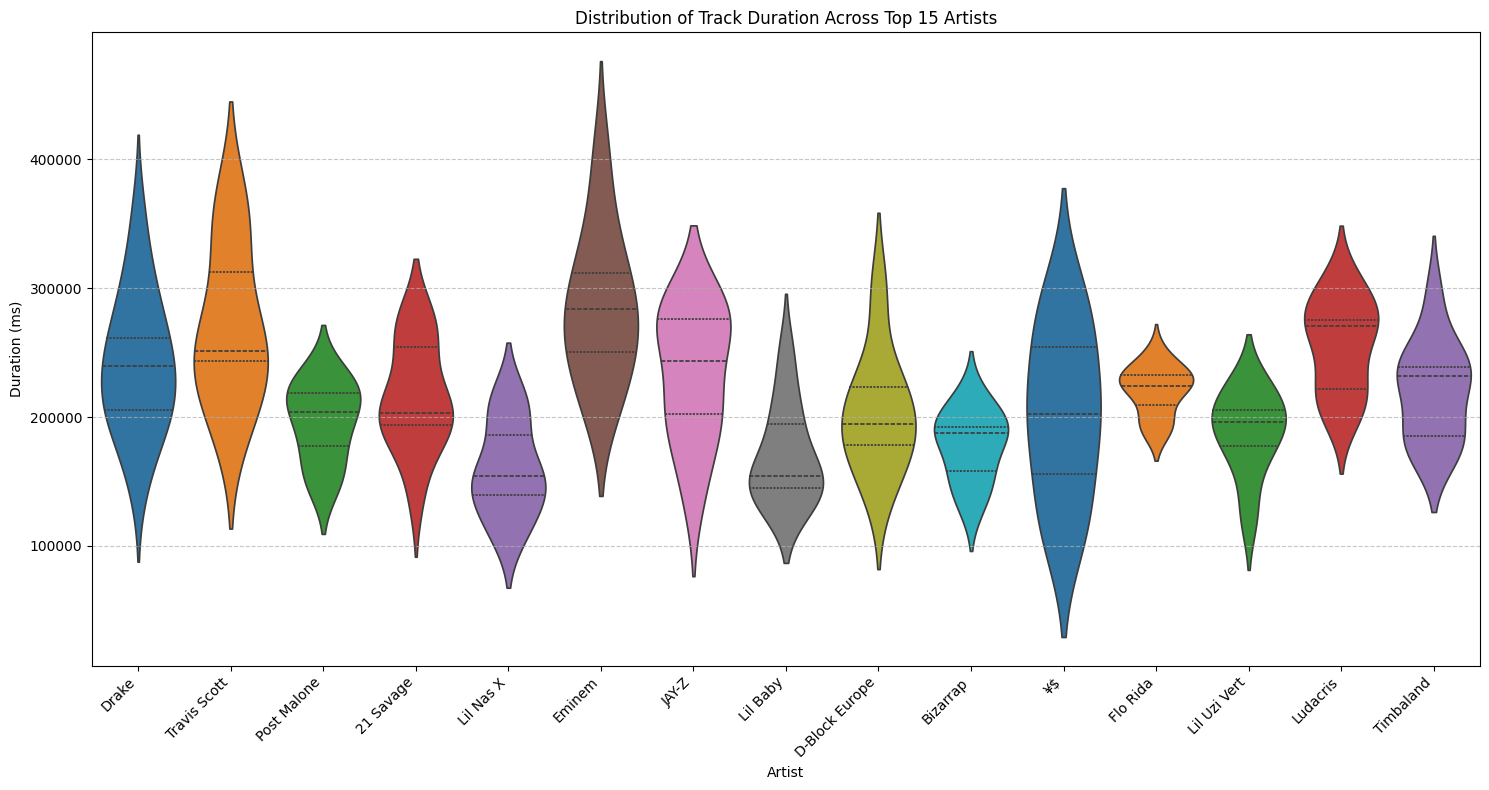

In [37]:
# Get the top 15 artists by number of tracks to ensure readability of the plot
top_n_artists_by_tracks = df3['Artist'].value_counts().head(15).index.tolist()

# Filter the DataFrame to include only tracks from these top artists
df_filtered = df3[df3['Artist'].isin(top_n_artists_by_tracks)]

# Create a violin plot of 'Duration (ms)' for each of the top artists
plt.figure(figsize=(15, 8))
sns.violinplot(x='Artist', y='Duration (ms)', data=df_filtered, inner='quartile', palette='tab10')
plt.title('Distribution of Track Duration Across Top 15 Artists')
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

10. **How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.**

<ipython-input-38-f4d9aa9086fb>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Artist', y='Popularity', data=df_filtered_popularity, inner='quartile', palette='magma')


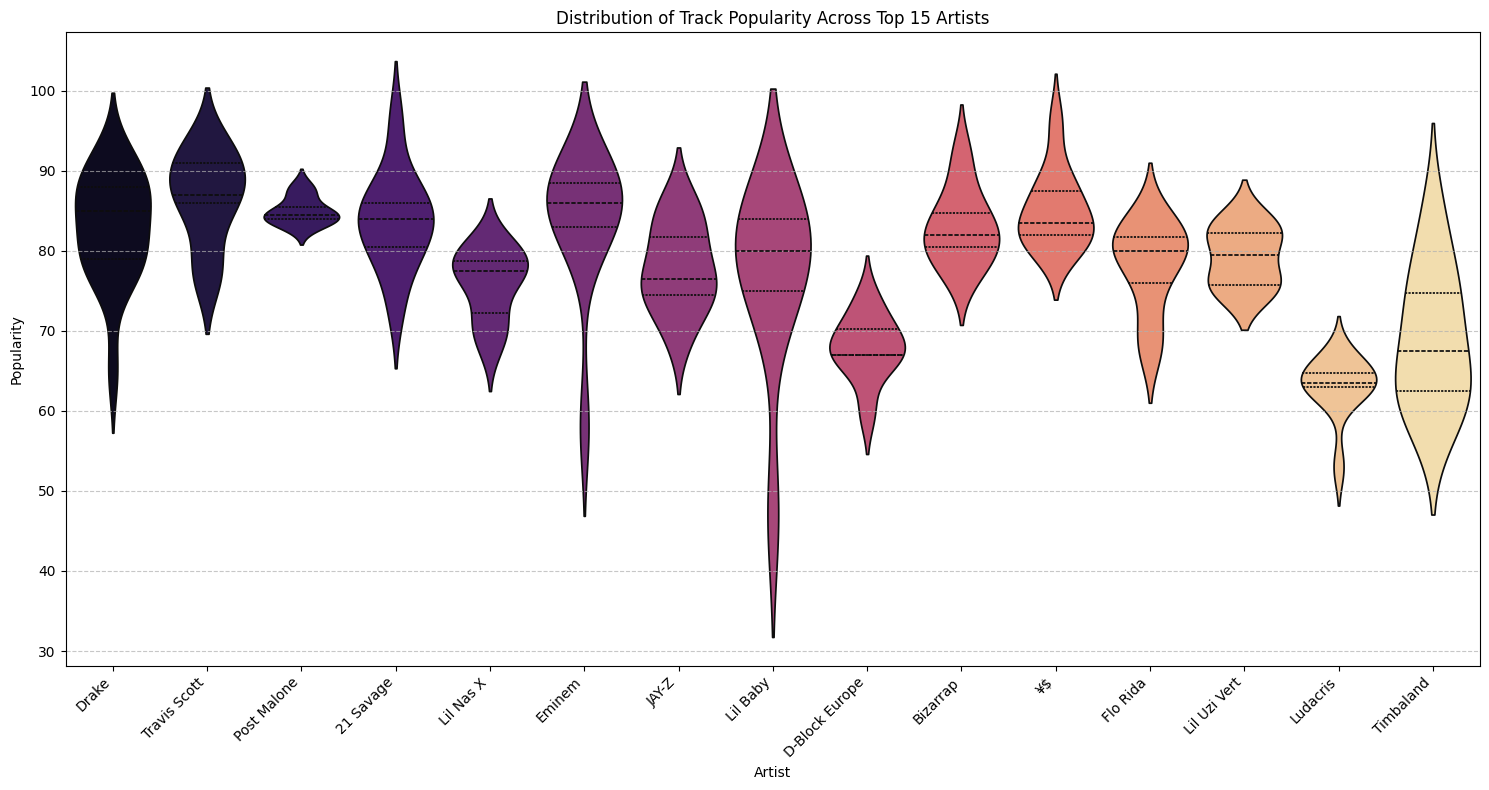

In [38]:
# Get the top 15 artists by number of tracks, as done previously, to ensure readability
top_n_artists_by_tracks = df3['Artist'].value_counts().head(15).index.tolist()

# Filter the DataFrame to include only tracks from these top artists
df_filtered_popularity = df3[df3['Artist'].isin(top_n_artists_by_tracks)]

# Create a violin plot of 'Popularity' for each of the top artists
plt.figure(figsize=(15, 8))
sns.violinplot(x='Artist', y='Popularity', data=df_filtered_popularity, inner='quartile', palette='magma')
plt.title('Distribution of Track Popularity Across Top 15 Artists')
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()